In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
def rho_green_light(x, rho_light):
    rho = numpy.zeros_like(x)
    mask = numpy.where(x < 2.0)
    rho[mask] = rho_light * x[mask] / 2.0
    return rho

In [4]:
nx = 81
L = 4.0 
dx = L / (nx - 1) 
nt = 30 
u_max = 1.0
rho_max = 10.0 
rho_light = 10.0 
x = numpy.linspace(0.0, L, num=nx)
rho0 = rho_green_light(x, rho_light)

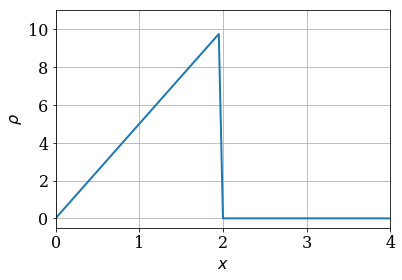

In [5]:
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
pyplot.plot(x, rho0, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 11.0);

In [6]:
def flux(rho, u_max, rho_max):
    F = rho * u_max * (1.0 - rho / rho_max)
    return F

In [7]:
def ftbs(rho0, nt, dt, dx, bc_value, *args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = flux(rho, *args)
        rho[1:] = rho[1:] - dt / dx * (F[1:] - F[:-1])
        rho[0] = bc_value
        rho_hist.append(rho.copy())
    return rho_hist

In [8]:
sigma = 1.0
dt = sigma * dx / u_max 
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

In [9]:
from matplotlib import animation
from IPython.display import HTML

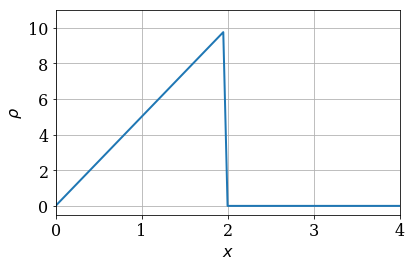

In [10]:
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0,
                    color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 11.0)
fig.tight_layout()

In [11]:
def update_plot(n, rho_hist):
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(rho_hist[n])

In [12]:
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(rho_hist,),
                               interval=100)
HTML(anim.to_html5_video())

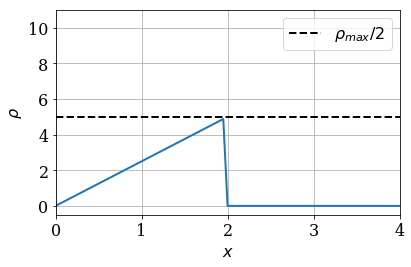

In [13]:
nt = 40 
rho_light = 5.0
rho0 = rho_green_light(x, rho_light)
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0,
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.hlines(rho_max / 2.0, 0.0, L,
              label=r'$\rho_{max} / 2$',
              color='black', linestyle='--', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 11.0)
fig.tight_layout()

In [14]:
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

In [15]:
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(rho_hist,),
                               interval=100)
HTML(anim.to_html5_video())

In [16]:
rho_light = 4.0
u_max = 1.1
rho0 = rho_green_light(x, rho_light)
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(rho_hist,),
                               interval=100)
HTML(anim.to_html5_video())